**Load and preprocess dataset**

In [3]:
# shape of the X_train
X_train.shape

(60000, 28, 28)

In [1]:
# import libraries
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [37]:
# shape of the X_test
X_test.shape

(10000, 28, 28, 1)

In [38]:
# shape of the y_train
y_train.shape

(60000,)

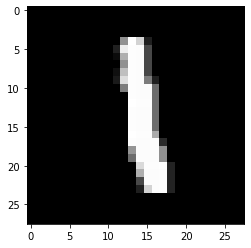

In [5]:
# display one of the images
plt.imshow(X_train[6], cmap = 'gray')

In [6]:
# Reshape the test and train dataset such that, they maintain the same shape
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [7]:
# Redefine datatype and rescale, the train and test dataset
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [8]:
# load categorization dataset
from keras.utils.np_utils import to_categorical

In [9]:
# Convert the y_train and y_test to categorical features
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [10]:
# print the shape of y_train
y_train_cat.shape

(60000, 10)

In [11]:
# print the shape of y_test
y_test_cat.shape

(10000, 10)

In [12]:
# print the value X_train
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
# Reshape the test and train dataset such that, they maintain the same shape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [14]:
# print out the shape of X_train
X_train.shape

(60000, 28, 28, 1)

**Defining model architecture and training the model**

In [15]:
# Load libraries for deep learning modelling
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.layers import Flatten, Activation
from keras.layers import MaxPool2D, AvgPool2D, Conv2D

In [16]:
# clear session
K.clear_session()
# define model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), ))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), )) 
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [17]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
activation (Activation)      (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [18]:
# train model
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
329/329 [==============================] - 32s 96ms/step - loss: 0.5036 - accuracy: 0.8437 - val_loss: 0.1044 - val_accuracy: 0.9669
Epoch 2/5
329/329 [==============================] - 31s 94ms/step - loss: 0.0727 - accuracy: 0.9787 - val_loss: 0.0552 - val_accuracy: 0.9840
Epoch 3/5
329/329 [==============================] - 31s 95ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.0520 - val_accuracy: 0.9842
Epoch 4/5
329/329 [==============================] - 31s 94ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0494 - val_accuracy: 0.9854
Epoch 5/5
329/329 [==============================] - 31s 94ms/step - loss: 0.0216 - accuracy: 0.9922 - val_loss: 0.0452 - val_accuracy: 0.9876


**Model Evaluation**

In [19]:
# evaluate model performance
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 3s 9ms/step - loss: 0.0339 - accuracy: 0.9897


[0.03388934209942818, 0.9897000193595886]

**Save and load model**

In [20]:
# serialize model to JSON
model_json = model.to_json()

In [21]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [22]:
# serialize weights to HDF5
model.save_weights("model.h5")

In [28]:
# load json and create model
json_file = open('/content/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [30]:
from keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/model.h5")

In [31]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test_cat, verbose=0)

In [32]:
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 98.97%
